# NTK example for the SSL interplay

In [1]:
# Overall matplotlib settings
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('text.latex', preamble= r'\usepackage{mathtools}')
plt.rc('font', size=10, family='serif', serif='cm')

figsize_default = (3., 2.5)

In [2]:
import numpy as np
import math
pi = math.pi


def kernel(x,y, bias = 0, weight = 1, layers = 2):
  def recurse_step(corr, x_corr, y_corr):
    theta = np.arccos(corr / np.sqrt(x_corr*y_corr))
    corr = bias*bias + weight*weight/pi/2*(np.sin(theta) + (pi-theta)*np.cos(theta))
    return corr
  n = x.shape[-1]
  corr = np.sum(x*y, axis = -1)/n
  corr = bias*bias + weight*weight*corr
  x_corr = bias*bias + weight*weight*np.ones(corr.shape)
  y_corr = bias*bias + weight*weight*np.ones(corr.shape)
  for _ in range(layers):
    corr = recurse_step(corr, x_corr, y_corr)
    x_corr = recurse_step(x_corr, x_corr, x_corr)
    y_corr = recurse_step(y_corr, y_corr, y_corr)

  return corr

In [3]:
def boolean_strings(n):
    boolean_strings = np.ones((2**n,n))
    # Iterate through all possible binary strings of length n
    for i in range(2**n):
        # Convert the binary string to an array of -1 and 1
        binary_string = np.array([1 if digit=='1' else -1 for digit in bin(i)[2:].zfill(n)])
        # Append the array to the list of boolean strings
        boolean_strings[i] = binary_string

    return boolean_strings


In [4]:
diams = [6, 5, 4]
cards = [2, 3, 4]
n = 12
strings = boolean_strings(n)


def get_eig_T(diam,n):
  out = 8-diam+1
  if out < 0:
    return 0
  else:
    return out*out/n/n

def get_eig_K(card):
  parity = np.prod(strings[:,:card],axis=-1)
  input = np.ones((2**n,n))
  input[:] = np.asarray([-1]*card + [1]*(n-card))
  k = kernel(input,strings)
  return np.abs(np.sum(k*parity)/(2**n))


eig_T = [get_eig_T(d,n) for d in diams]
eig_K = [get_eig_K(c) for c in cards]
print(eig_T)
print(eig_K)


[0.0625, 0.1111111111111111, 0.17361111111111113]
[0.0010193152149029425, 5.965545677722589e-05, 1.448151418104171e-05]


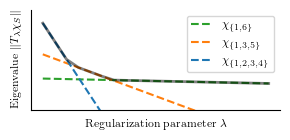

In [8]:
fig, ax = plt.subplots(figsize=(3, 1.5))


x = np.linspace(0, 0.00001, 20)
max_y = np.ones(x.shape)*-100000
labels = [r'$\chi_{\{1, 6\}}$', r'$\chi_{\{1, 3, 5\}}$', r'$\chi_{\{1, 2, 3, 4\}}$']
for line, color in enumerate( ['C2', 'C1', 'C0']):
    slope = -1/eig_K[line]
    intercept = eig_T[line]
    y = slope * x + intercept
    max_y = np.maximum(max_y,y)
    ax.plot(x, y, '--', color=color, label = labels[line])

ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\lambda$', fontsize=8)
ax.set_ylabel(r'$\lambda_i - \lambda\|\theta_i\|^2$', fontsize=8)
ax.legend(fontsize=8)

ax.plot(x, max_y, '-k', linewidth=2, alpha=0.5)
ax.set_xlabel(r'Regularization parameter $\lambda$',fontsize=8)
ax.set_ylabel(r'Eigenvalue $\|T_\lambda \chi_S\|$', fontsize=8)
ax.set_ylim([0,0.2])
fig.tight_layout()
plt.savefig('eig_comparison_crop.pdf')#, bbox_inches='tight')
plt.show()

